In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df[['loan_intent']].value_counts()
#df.head()

loan_intent      
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                       shuffle = True,
#                                                       random_state = 440,
#                                                       test_size = .2)
#
#
#bb_train, bb_test = train_test_split(baseball.copy(),
#                                        random_state = 614,
#                                        shuffle = True,
#                                        test_size=.2)
df_train, df_test=train_test_split(df.copy(), shuffle=True, random_state=42, test_size=.2)

In [7]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
14337,14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15,0
17117,17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9,0
32590,32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3,0
55811,55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11,0
40120,40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2,0


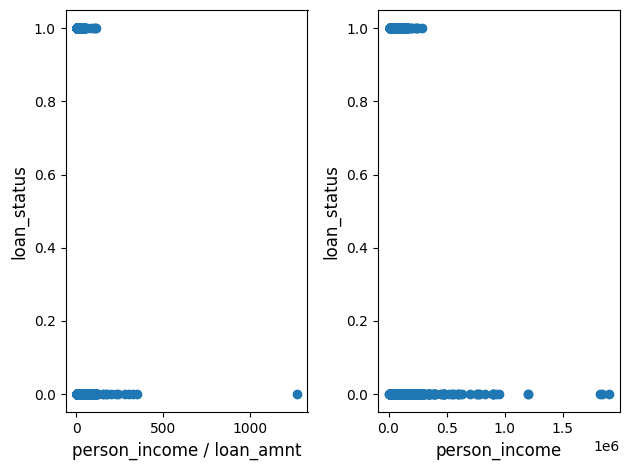

In [8]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(df_train['person_income']/df_train['loan_amnt'], df_train['loan_status'])

ax[0].set_ylabel('loan_status', fontsize=12)
ax[0].set_xlabel('person_income / loan_amnt', fontsize=12)


ax[1].scatter(df_train['person_income'], df_train['loan_status'])

ax[1].set_ylabel('loan_status', fontsize=12)
ax[1].set_xlabel('person_income', fontsize=12)


plt.tight_layout() #this command is to automatically adjust so that the two plots don't overlap
plt.show()

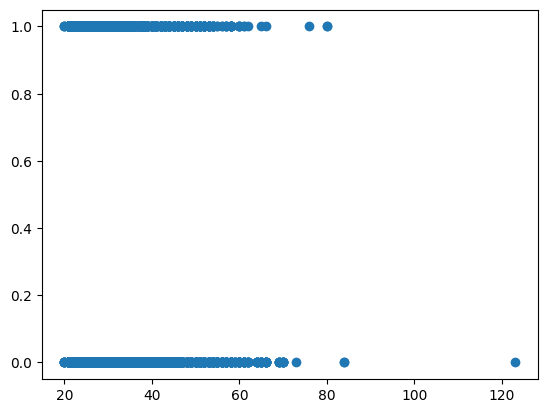

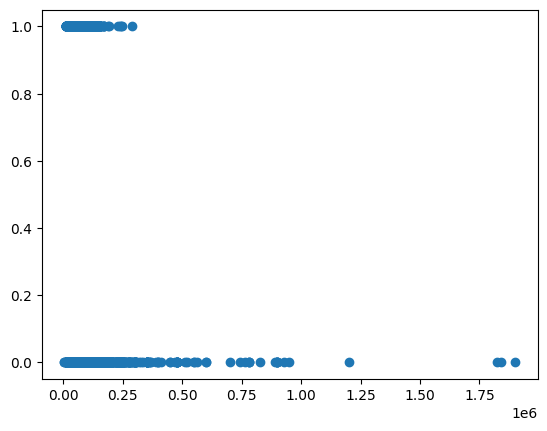

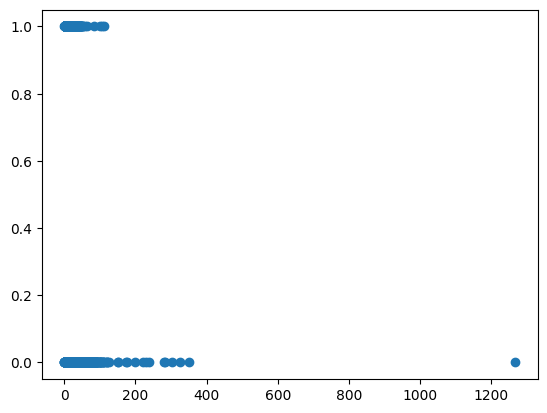

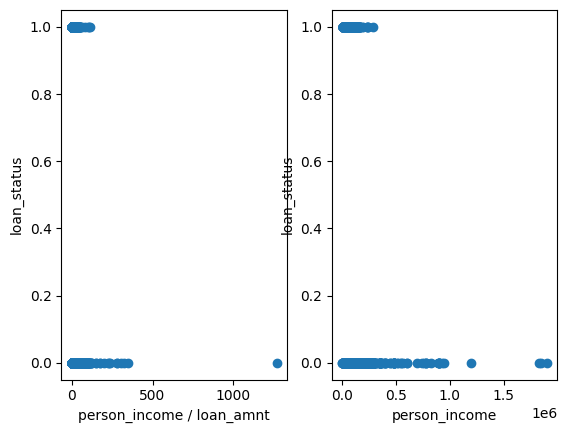

In [27]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(df_train['person_income']/df_train['loan_amnt'], df_train['loan_status'])

ax[0].set_ylabel('loan_status')
ax[0].set_xlabel('person_income / loan_amnt')


ax[1].scatter(df_train['person_income'], df_train['loan_status'])

ax[1].set_ylabel('loan_status')
ax[1].set_xlabel('person_income')

plt.show()